<a href="https://colab.research.google.com/github/Edo988/Entregas/blob/main/ProyectoDSParteI%2BTELLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONSIGNA:**

1-Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.

2-Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.

3-Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.

4-Identificar valores perdidos.

**1.**

**PREGUNTAS**

A-Que categoria es la que predomina?

B-Cómo se distribuye el gasto (Purchase Amount (USD)) según la categoría de producto (Category) y el género (Gender)?

C-que género compra mas en las diferentes categorias?

D-Cómo se distribuyen los montos de compra, se realizan mas compras de montos bajos que de montos altos?

**HIPOTESIS**

1.C:El género femenino tenderá a compras más altas en categorías como Clothing (Ropa) y Accessories (Accesorios) que el genero masculino.



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'shopping_trends_updated.csv'

df = pd.read_csv(file_path)
print(df.head())

df.info()
print("Resumen estadístico de columnas numéricas")
print(df.describe())

print("Resumen estadístico de columnas numéricas")
print(df.describe())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

**LIMPIEZA DE DATOS Y CONVERSION**

In [36]:
#4-Identificar valores perdidos.

#Se identifica los valores nulos y se hace la conversion de object a numerico.

print("Cantidad de valores nulos antes de eliminarlos")
print(df.isnull().sum())

#Columnas que deberian ser numéricas y no 'object'
numeric_cols_to_check = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']

for col in numeric_cols_to_check:
    if col in df.columns: # Aseguramos que exista la columuna
        # Convertir a numérico, coercing errors a NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Si se introducen NaNs, imputarlos con la mediana
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Valores nulos en '{col}' imputados con la mediana: {median_val}")

# Se identifica y se convierte otras columnas 'object' a tipo 'category' porque son categorias.
for col in df.select_dtypes(include='object').columns:
    if col not in ['Customer ID', 'Item Purchased', 'Location', 'Color']: # Columnas que pueden tener demasiados valores únicos o no son puramente categóricas para este análisis
        df[col] = df[col].astype('category')
        print(f"Columna '{col}' convertida a tipo 'category'.")

print("Cantidad de valores nulos después de eliminarlos")
print(df.isnull().sum())

print("Tipos de datos después de la eliminacion y conversión")
df.info()


Cantidad de valores nulos antes de eliminarlos
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Payment Method              0
Frequency of Purchases      0
Purchase_Amount_Category    0
dtype: int64
Cantidad de valores nulos después de eliminarlos
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating        

2.
**Análisis de Datos y Graficos**

/tmp/ipython-input-4010233357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Spectral', order=df['Category'].value_counts().index)


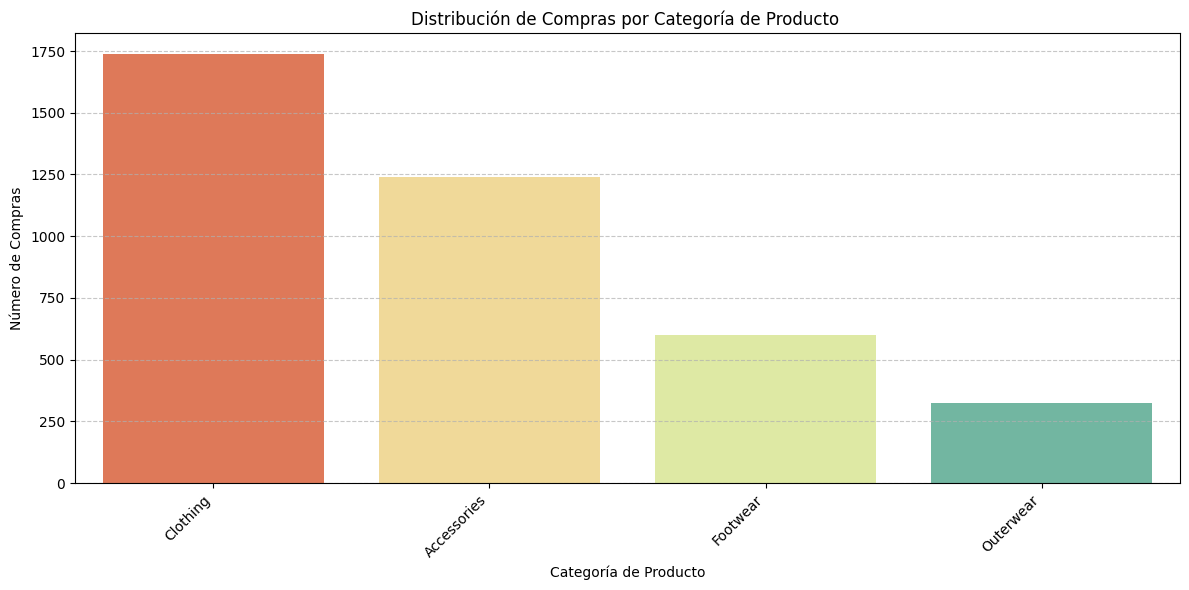

Distribución de Categorías
Conteo de Categorías:Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
Porcentaje de Categorías:Category
Clothing       44.54
Accessories    31.79
Footwear       15.36
Outerwear       8.31
Name: proportion, dtype: float64%
Conclusion: La categoría 'Clothing' (Ropa) es la más comprada, seguida por 'Accessories' (Accesorios)


In [31]:
#1.A-¿Que categoria es la que predomina?

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, palette='Spectral', order=df['Category'].value_counts().index)
plt.title('Distribución de Compras por Categoría de Producto ')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para que se vea mejor
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

category_counts = df['Category'].value_counts()
category_percentages = df['Category'].value_counts(normalize=True) * 100
print("Distribución de Categorías")
print(f"Conteo de Categorías:{category_counts}")
print(f"Porcentaje de Categorías:{category_percentages.round(2)}%")
print("Conclusion: La categoría 'Clothing' (Ropa) es la más comprada, seguida por 'Accessories' (Accesorios)")

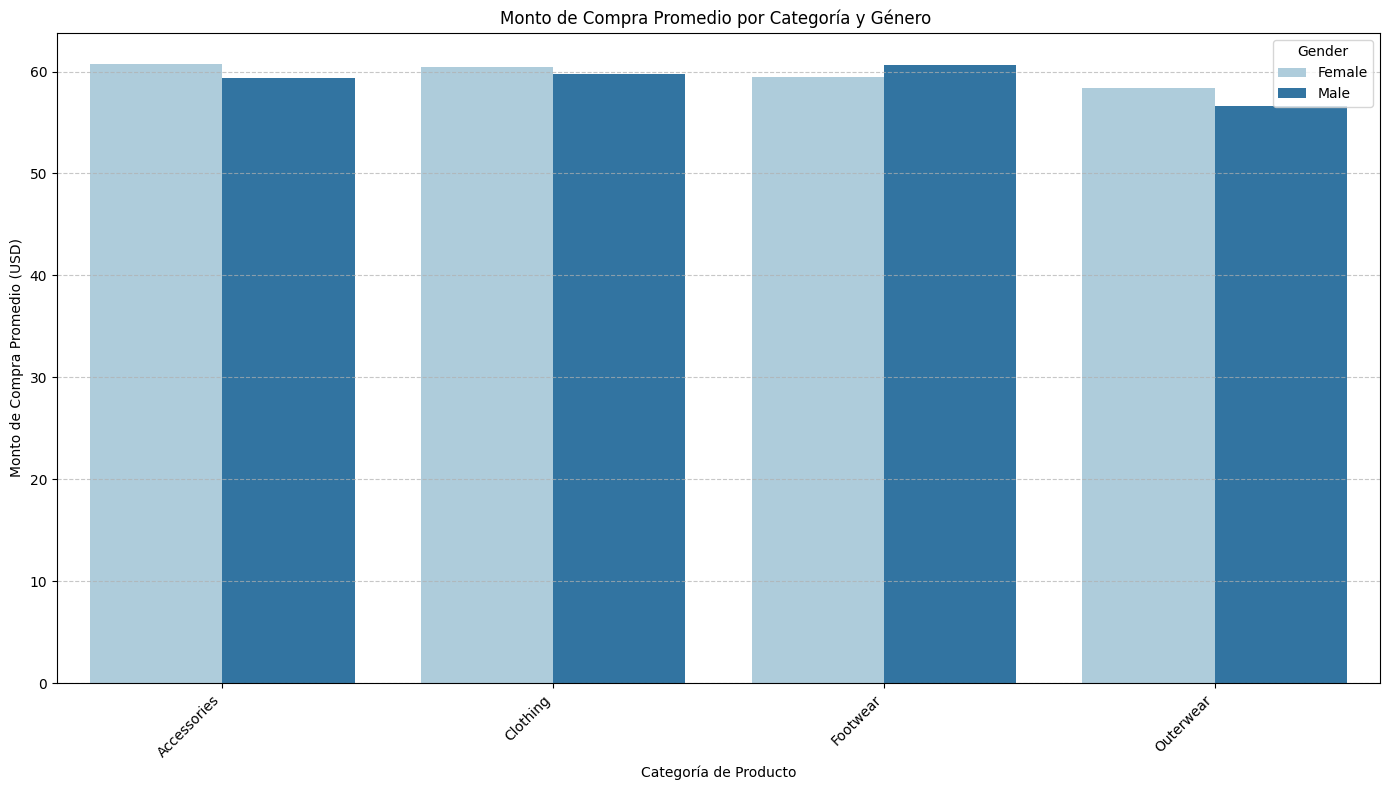

Resumen Numérico: Monto de Compra Promedio por Categoría y Género
Gender       Female   Male
Category                  
Accessories   60.76  59.41
Clothing      60.50  59.80
Footwear      59.47  60.64
Outerwear     58.43  56.61
Cpnclusion: Como dice la hipótesis 1.C,El género femenino tenderá a compras más altas en categorías como Clothing (Ropa) y Accessories (Accesorios) que el genero masculino.


/tmp/ipython-input-2260652108.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_gender_purchase = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().unstack().round(2)


In [35]:
#1.B-¿Cómo se distribuye el gasto (Purchase Amount (USD)) según la categoría de producto (Category) y el género (Gender)?
#1.C-¿hay diferencias en el gasto entre géneros para las diferentes categorías?

plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=df, palette='Paired', errorbar=None)
plt.title('Monto de Compra Promedio por Categoría y Género ')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto de Compra Promedio (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Resumen en vaolores
category_gender_purchase = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().unstack().round(2)
print("Resumen Numérico: Monto de Compra Promedio por Categoría y Género")
print(category_gender_purchase)
print("Cpnclusion: Como dice la hipótesis 1.C,El género femenino tenderá a compras más altas en categorías como Clothing (Ropa) y Accessories (Accesorios) que el genero masculino.")

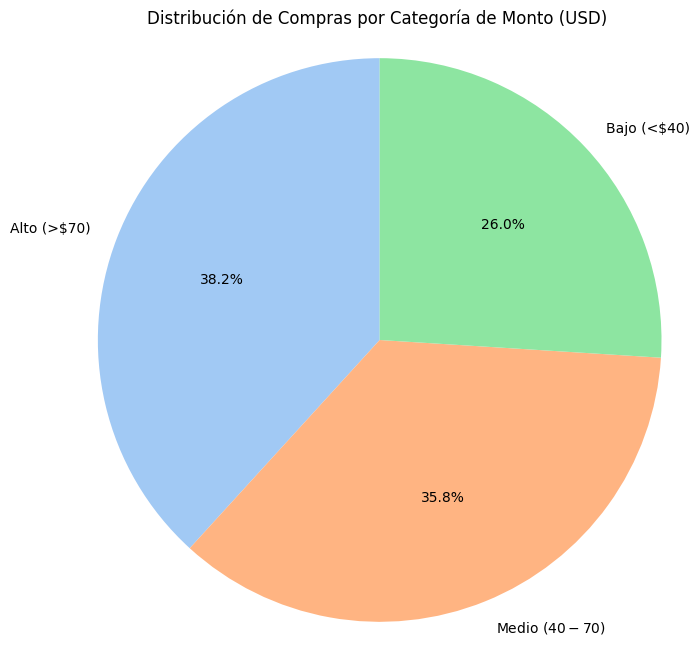

Resumen Numérico: Distribución del Monto de Compra por Categoría
Conteo de Compras por Categoría de Monto:
Purchase_Amount_Category
Alto (>$70)        1491
Medio ($40-$70)    1395
Bajo (<$40)        1014
Name: count, dtype: int64

Porcentaje de Compras por Categoría de Monto:
Purchase_Amount_Category
Alto (>$70)        38.23
Medio ($40-$70)    35.77
Bajo (<$40)        26.00
Name: proportion, dtype: float64%
Se observa que la mayoría de las compras se sitúan en el rango 'Medio', seguido por 'Alto' y 'Bajo'. Esto indica una distribución relativamente equilibrada entre montos de compra, aunque el segmento medio es el más frecuente. Es importante recordar que esta visualización categoriza un dato continuo, por lo que un histograma (como el anterior) ofrecería una visión más detallada de la distribución exacta de los valores.


In [33]:
#1.D-Cómo se distribuyen los montos de compra, se realizan mas compras de montos bajos que de montos altos?

bins = [0, 40, 70, df['Purchase Amount (USD)'].max() + 1] # +1 para asegurar que el valor máximo esté incluido
labels = ['Bajo (<$40)', 'Medio ($40-$70)', 'Alto (>$70)']
df['Purchase_Amount_Category'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)

# Proporciones para el grafico de torata
purchase_category_counts = df['Purchase_Amount_Category'].value_counts()
purchase_category_percentages = df['Purchase_Amount_Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(purchase_category_counts, labels=purchase_category_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Compras por Categoría de Monto (USD) ')
plt.axis('equal') # Grafico circular
plt.show()


print("Resumen Numérico: Distribución del Monto de Compra por Categoría")
print(f"Conteo de Compras por Categoría de Monto:\n{purchase_category_counts}")
print(f"\nPorcentaje de Compras por Categoría de Monto:\n{purchase_category_percentages.round(2)}%")
print("Se observa que la mayoría de las compras se sitúan en el rango 'Medio', seguido por 'Alto' y 'Bajo'. Esto indica una distribución relativamente equilibrada entre montos de compra, aunque el segmento medio es el más frecuente. Es importante recordar que esta visualización categoriza un dato continuo, por lo que un histograma (como el anterior) ofrecería una visión más detallada de la distribución exacta de los valores.")
